In [10]:
import pandas as pd
import os
import numpy as np


print(os.getcwd())

D:\_PlayGround\Github\pg\_chaos


In [11]:
df = pd.read_excel(io='sample800.xlsx', sheet_name='Sheet1')

###### Tools

In [103]:
from sklearn import metrics
'''
metrics.explained_variance_score
metrics.mean_absolute_error
metrics.mean_squared_error
metrics.mean_squared_log_error
metrics.median_absolute_error
metrics.r2_score
'''

def print_metrics(actual, pred):
    actual = np.array(actual) if isinstance(actual, list) else actual
    pred = np.array(pred) if isinstance(pred, list) else pred

    actual = actual.reshape(-1, 1) if len(actual.shape) == 1 else actual
    pred = pred.reshape(-1, 1) if len(pred.shape) == 1 else pred
    
    evs = metrics.explained_variance_score(actual, pred)
    mse = metrics.mean_squared_error(actual, pred)
    mse_ppm = mse * 1e6 / 800
    mae = metrics.mean_absolute_error(actual, pred)
    mae_ppm = mae * 1e6 / 800
    r2 = metrics.r2_score(actual, pred)
    max_abs_err = float(np.max(np.abs(actual - pred)))
    
    print('MSE:     :', mse)
    print('MSE ppm  :', mse_ppm)
    print('MAE:     :', mae)
    print('MAE ppm  :', mae_ppm)
    print('Max er   :', max_abs_err)
    print('EVS:     :', mae)
    print('R2 score :', r2)
    

In [102]:
print_metrics([1, 2, 3], [1.1, 1.9, 3])

MSE:     : 0.006666666666666678
MSE ppm  : 8.333333333333348
MAE:     : 0.06666666666666672
MAE ppm  : 83.3333333333334
Max er   : 0.10000000000000009
EVS:     : 0.06666666666666672
R2 score : 0.99


### model - poly reg

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['U']].values
dataset_y = df[['G']].values / 5 * 1500

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['U']]
dataset_y = df[['G']] / 5 * 1500

In [69]:
np.max(dataset_X)

U    4.531837
dtype: float64

In [70]:
np.min(dataset_X)

U    0.616452
dtype: float64

In [71]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42, shuffle=True)

###### plot training set

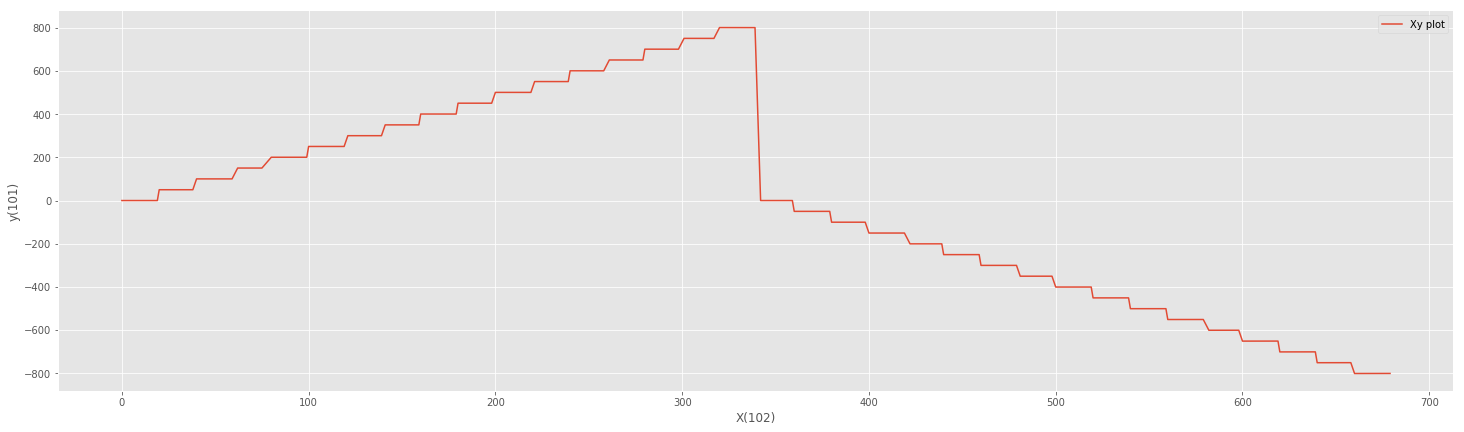

In [72]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
# plt_x = range(len(training_set_X))
plt_x = training_set_X.sort_index().index
plt.plot(plt_x, (training_set_y.sort_index()), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


###### Ordinary Least Squares

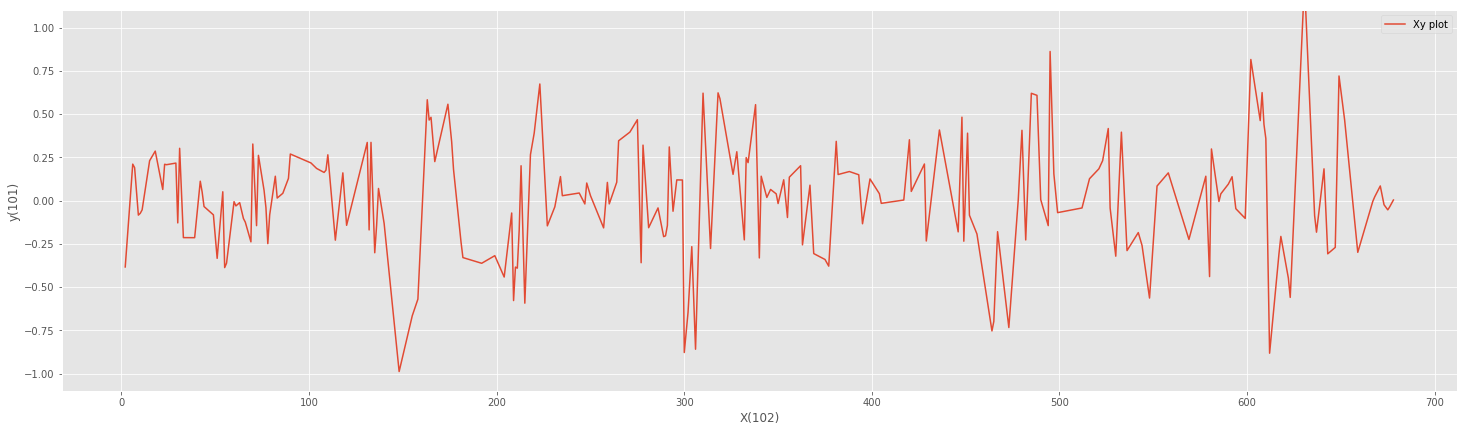

MSE:     : 0.1170881442429497
MSE ppm  : 146.36018030368712
MAE:     : 0.2602271958333379
MAE ppm  : 325.2839947916724
Max er   : 1.1641364062500088
EVS:     : 0.2602271958333379
R2 score : 0.9999994626111541


In [94]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


poly = PolynomialFeatures(degree=37)
training_set_X_poly_reg = poly.fit_transform(training_set_X)
test_set_X_poly_reg = poly.fit_transform(test_set_X.sort_index())  # sorted by index

model_poly_reg = linear_model.LinearRegression(normalize=True)
model_poly_reg.fit(training_set_X_poly_reg, training_set_y)
test_set_pred_poly_reg = model_poly_reg.predict(test_set_X_poly_reg)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt.ylim(ymax=1.1, ymin=-1.1)
# plt_x = range(len(test_set_X))
plt_x = test_set_X.sort_index().index
plt.plot(plt_x, (test_set_y.sort_index() - test_set_pred_poly_reg), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()

print_metrics(test_set_y.sort_index(), test_set_pred_poly_reg)

###### plot - test set

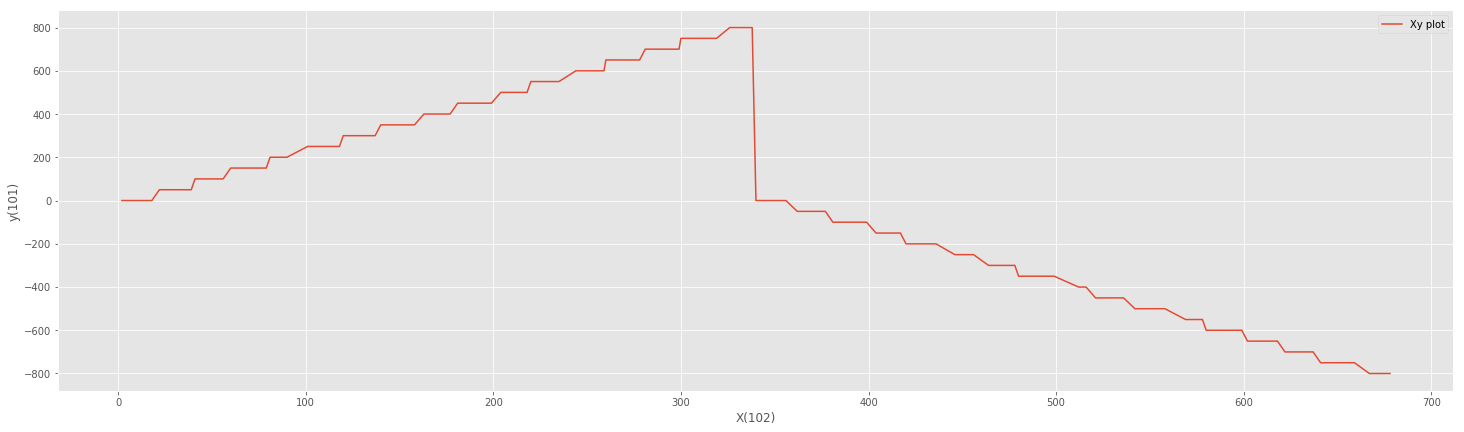

In [78]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
# plt_x = range(len(training_set_X))
plt_x = test_set_X.sort_index().index
plt.plot(plt_x, (test_set_y.sort_index()), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


- expected gold error: 1ppm = 800 / 1000000 = 0.0008
- normal silver error: 1% = 800 / 100 = 8

In [105]:
test_set_y.sort_index()

,G
2,0.013683
6,0.013946
7,0.013984
9,0.013645
10,0.013946
11,0.013833
15,0.013494
18,0.013419
22,50.076645
23,50.075889


In [107]:
pd.DataFrame(test_set_pred_poly_reg)

,0
0,0.204215
1,-0.385151
2,-0.365013
3,-0.092985
4,-0.103054
5,-0.123233
6,-0.405329
7,-0.460710
8,49.565491
9,49.419462


### grid

In [18]:
grid_x_start = -1.
grid_x_end = 45.

In [38]:
grid_x_val, spacing = np.linspace(start=grid_x_start, stop=grid_x_end, num=10000, endpoint=True, retstep=True)

In [39]:
grid_x_val[0]

-1.0

In [40]:
grid_x_val[1]

-0.9953995399539954

In [43]:
grid_x_val_poly_reg = poly.fit_transform(grid_x_val.reshape(-1, 1))
grid_y_val_poly_reg_pred = model_poly_reg.predict(grid_x_val_poly_reg)

In [44]:
grid_y_val_poly_reg_pred

array([[-1.76913511],
       [-1.76095861],
       [-1.75278211],
       ...,
       [79.88345891],
       [79.89161782],
       [79.89977673]])

In [57]:
def get_bound(grid_x_val, input_x, ):
    for i in range(len(grid_x_val)-1):
        if grid_x_val[i] <= input_x and input_x <= grid_x_val[i+1]:
            lower = grid_x_val[i]
            upper = grid_x_val[i+1]
            break      
        
    interval = upper - lower
    ip_b = (upper - input_x) / interval
    ip_a = 1 - ip_b
    return i, i+1, ip_a, ip_b

get_bound(grid_x_val, input_x=3)

(869, 870, 0.4782608695652846, 0.5217391304347154)

In [58]:
def grid_inner_pred(input_x, grid_x_val, grid_y):
    
    lower_idx, upper_idx, ip_a, ip_b = get_bound(grid_x_val, input_x)
    lower_y = grid_y[lower_idx]
    upper_y = grid_y[upper_idx]
    
    return lower_y * ip_a + upper_y * ip_b
    
    

In [59]:
grid_inner_pred(3, grid_x_val, grid_y_val_poly_reg_pred)

array([5.33984735])

In [68]:
xy = np.concatenate((grid_x_val.reshape(-1, 1), grid_y_val_poly_reg_pred), axis=1)

In [70]:
np.savetxt("foo.csv", xy, delimiter=",")

In [71]:
import os
os.getcwd()

'C:\\My\\x2\\180421\\csv'